<a href="https://colab.research.google.com/github/YannnLing/CHN_REC/blob/main/Chinese_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自學 - 繁體中文手寫辨識


In [3]:
#!git clone https://github.com/chenkenanalytic/handwritting_data_all.git

In [4]:
#!cat /content/handwritting_data_all/all_data.zip* > /content/handwritting_data_all/all_data.zip

In [5]:
#!unzip -O big5 /content/handwritting_data_all/all_data.zip -d "/content"

### 匯入套件

In [6]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
# import PIL.Imag
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

### 繁體中文顯示設定


In [7]:
default_type = findfont(FontProperties(family = FontProperties().get_family()))
ttf_path = '/'.join( default_type.split('/')[:-1] )  # 預設字型的資料夾路徑

os.chdir( '/content' )                               # 將當前工作目錄切換到 /content，這是 Google Colab 的預設工作目錄。
if not os.path.exists( '/content/matplotlib_Display_Chinese_in_Colab' ):         # 檢查 /content 目錄下是否已經存在 matplotlib_Display_Chinese_in_Colab 這個資料夾。
    !git clone https://github.com/YenLinWu/matplotlib_Display_Chinese_in_Colab   # 如果 matplotlib_Display_Chinese_in_Colab 資料夾不存在，這行程式碼會執行 git clone 命令，
                                                                                  # 從 GitHub 上複製 matplotlib_Display_Chinese_in_Colab 專案到本地的 /content 目錄中。
os.chdir( '/content/matplotlib_Display_Chinese_in_Colab' )
for item in os.listdir():                            # os.listdir():返回包含目錄中所有檔案和子目錄名稱的列表。
    if item.endswith( '.ttf' ):                      # 檢查是否以".ttf"結尾，是則返回TRUE，否返回FALSE。
        msj_ttf_path = os.path.abspath( item )       # os.path.abspath 會將相對路徑轉換為絕對路徑。
        msj_name = msj_ttf_path.split('/')[-1]       # 檔案路徑取最後一個斜線後的字串。


Cloning into 'matplotlib_Display_Chinese_in_Colab'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 13.26 MiB | 6.07 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [8]:
try:
    shutil.move( msj_ttf_path, ttf_path )     # 將 msj_ttf_path（找到的字型檔案的絕對路徑）移動到 ttf_path（預設字型資料夾路徑）
except:                                       # 這樣可以確保該字型檔案可以被 matplotlib 使用。
    pass
finally:                                      # 無論 try 區塊中是否發生例外情況都會執行。
    os.chdir( '/content' )
    shutil.rmtree( '/content/matplotlib_Display_Chinese_in_Colab' )   # 刪除 /content/matplotlib_Display_Chinese_in_Colab 目錄及其所有內容。

font = FontProperties( fname=ttf_path+'/'+msj_name )                  # 設定字型屬性

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )

Python Version:  3.10.12
TensorFlow Version:  2.15.0


### 下載繁體中文手寫資料集

In [10]:
!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 174 (delta 5), reused 1 (delta 1), pack-reused 167
Receiving objects: 100% (174/174), 77.40 MiB | 18.33 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (11/11), done.


In [11]:
import os
import zipfile
import shutil

OutputFolder = '/content/Handwritten_Data'

In [12]:
if not os.path.exists(OutputFolder):   # 檢查指定的路徑是否存在，為Boolean
  os.mkdir(OutputFolder)               # 創建OutputFolder資料夾
  print( f'Create the new "{OutputFolder}" folder' )   # f 字符串用來格式化輸出，將 OutputFolder 的值插入到字符串中。

os.chdir(OutputFolder)

### 檢查路徑 : 顯示當前工作目錄的完整路徑
!pwd

Create the new "/content/Handwritten_Data" folder
/content/Handwritten_Data


In [13]:
CompressedFiles = []

os.chdir('/content/Traditional-Chinese-Handwriting-Dataset/data')

for item in os.listdir():   # os.listdir() 函數返回一個包含目錄中所有文件和目錄名稱的列表。
  if item.endswith('.zip'): # Check for ".zip" extension.
    file_path = os.path.abspath(item) # Get full path of the compressed file.
    CompressedFiles.append(file_path)

for file in CompressedFiles:
  # Construct a ZipFile object with the filename, and then extract it.
  zip_ref = zipfile.ZipFile(file).extractall(OutputFolder)   # 將 file 壓縮文件中的所有內容解壓到 OutputFolder 目錄中。

  source_path = OutputFolder + '/cleaned_data(50_50)'
  img_list = os.listdir(source_path)

  for img in img_list:
      shutil.move(source_path + '/' + img, OutputFolder) # Move a file to another location.

  shutil.rmtree(OutputFolder + '/cleaned_data(50_50)')
  print(f'Decompress successfully {file} ......')

print( 'Moving images according to traditional Chinese characters......' )

Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-002.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-003.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-001.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-004.zip ......
Moving images according to traditional Chinese characters......


In [14]:
ImageList = os.listdir(OutputFolder)
ImageList = [img for img in ImageList if len(img)>1]
WordList = list(set([w.split('_')[0] for w in ImageList]))

for w in WordList:
  try:
    os.chdir(OutputFolder) # Change the current working directory to OutputPath.
    os.mkdir(w) # Create the new word folder in OutputPath.
    MoveList = [img for img in ImageList if w in img]

  except:
    os.chdir(OutputFolder)
    MoveList = [ img for img in ImageList if w in img ]

  finally:
    for img in MoveList:
      old_path = OutputFolder + '/' + img
      new_path = OutputFolder + '/' + w + '/' + img
      shutil.move( old_path, new_path )

print( 'Data Deployment completed.' )

Data Deployment completed.


In [15]:
a=0
b=0

for item in os.listdir(OutputFolder):
  a += 1
  for i in os.listdir(OutputFolder + '/' + item):
    b +=1


print('總共: ' + str(a) + ' 個字(資料夾) / 總共: ' + str(b) + '個樣本')
print('平均每個字有: ' + str(b/a) + ' 個樣本')

總共: 4803 個字(資料夾) / 總共: 250712個樣本
平均每個字有: 52.19904226525089 個樣本


###訓練集和測試集

In [16]:
os.chdir('/content')
os.mkdir('Traditional_Chinese_Testing_Data')
os.chdir('/content/Traditional_Chinese_Testing_Data')

!git clone https://github.com/AI-FREE-Team/Handwriting-Chinese-Characters-Recognition

Cloning into 'Handwriting-Chinese-Characters-Recognition'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 83 (delta 19), reused 18 (delta 18), pack-reused 63
Receiving objects: 100% (83/83), 4.27 MiB | 7.77 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [17]:
'''
RawDataPath: 繁中手寫資料集路徑
TraningDataPath: 訓練集路徑
TestingDataPath: 自製繁中手寫資料集路徑
'''
RawDataPath = '/content/Handwritten_Data'
TraningDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/train data'
TestingDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/test data'

os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() )

Current working directory: /content/Handwritten_Data


####訓練集

In [18]:
SelectedWords = [ '人', '工', '智', '慧' ]

os.chdir( RawDataPath )
try:
    os.mkdir( TraningDataPath )

except:
    shutil.rmtree( TraningDataPath )
    os.mkdir( TraningDataPath )

finally:
    nonexistence = []
    for c in SelectedWords:
        try:
            shutil.copytree( RawDataPath+'/'+c, TraningDataPath+'/'+c )
        except:
            nonexistence.append( c )

    if len(nonexistence)>1:
        print( f'There are {len(nonexistence)} characters that are not in dataset. \n{nonexistence}' )
    elif len(nonexistence)==1:
        print( f'There is {len(nonexistence)} character that is not in dataset. \n{nonexistence}' )
    else: print('')

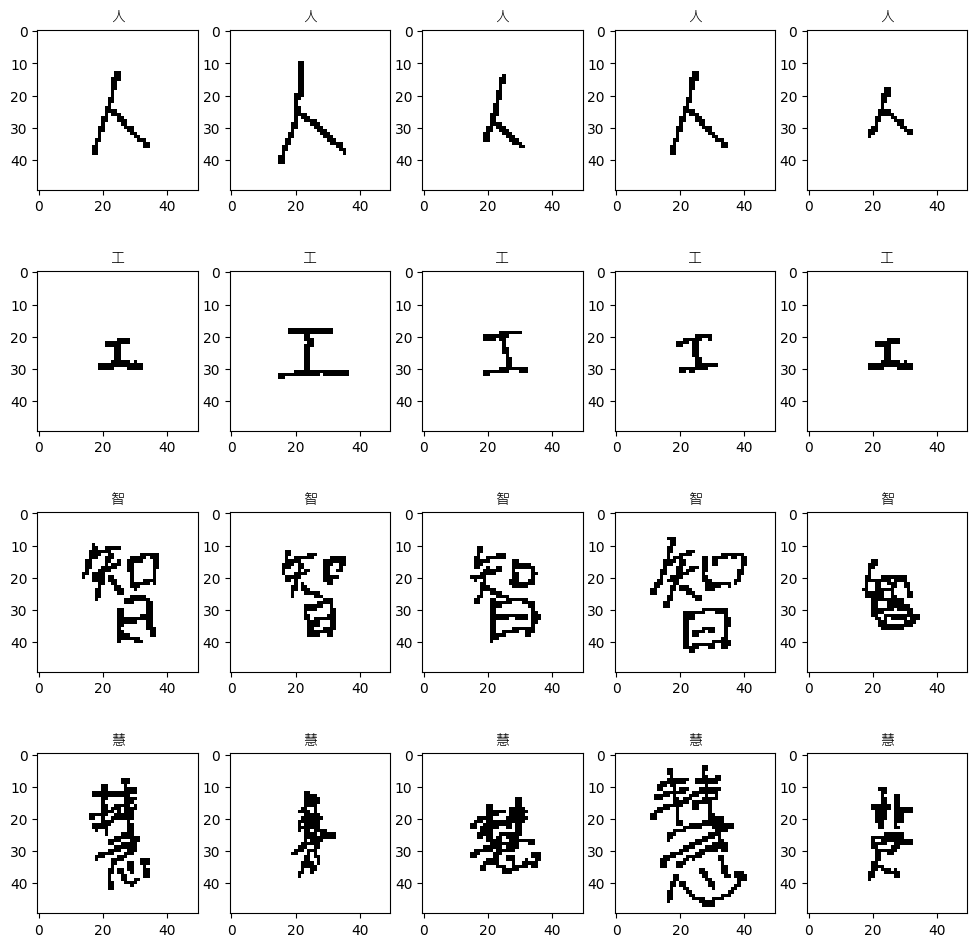

In [30]:
def Loading_Image( image_path ):
    img = load_img( image_path )         # 從指定的文件路徑加載圖像並返回圖像。
    img = tf.constant( np.array(img) )   # np.array(img) 將圖像對象轉換為 NumPy 數組。
    return img

def Show( image, title=None ) :
    if len( image.shape )>3 :
        image = tf.squeeze( image, axis=0 )   # 如果圖像的形狀（shape）中有超過三個維度，則使用 tf.squeeze 函數將其壓縮為三維。

    plt.imshow( image )
    if title:
        plt.title( title, fontproperties=font )

img_list = []
for c in SelectedWords :
    folder_path = TraningDataPath+'/'+c
    file_names = os.listdir( folder_path )
    for i in range(5) :
        img_list.append( folder_path+'/'+file_names[i] )

plt.gcf().set_size_inches( (12,12) )    # 設置當前圖形尺寸
for i in range(20):
    plt.subplot(4,5,i+1)
    title = img_list[i].split('/')[-1].split('_')[-2]
    img = Loading_Image( img_list[i] )
    Show( img, title )

### 超參數

In [31]:
Num_Classes = len(SelectedWords)
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 8

###Data Augamentation

####訓練集

In [24]:
Train_Data_Genetor = ImageDataGenerator( rescale = 1./255, validation_split = 0.2,   # 按指定的比例縮放圖像
                                         width_shift_range = 0.05,
                                         height_shift_range = 0.05,
                                         zoom_range = 0.1,
                                         horizontal_flip = False )

In [25]:
Train_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                          target_size = Image_Size,
                                                          batch_size = Batch_Size,
                                                          class_mode = 'categorical',
                                                          shuffle = True,
                                                          subset = 'training' )

Found 164 images belonging to 4 classes.


batch 1: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


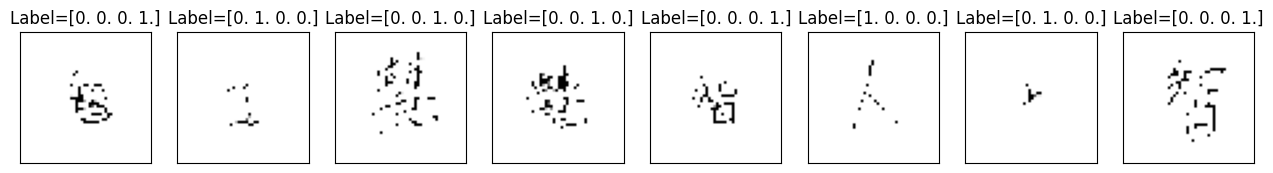

batch 2: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


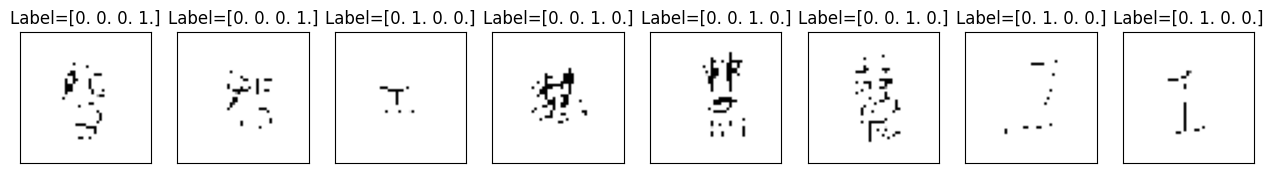

batch 3: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


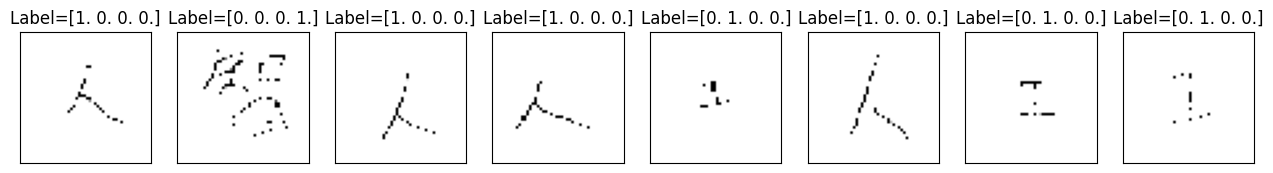

batch 4: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


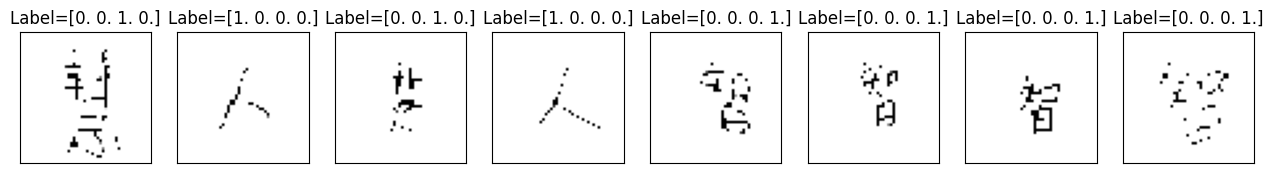

batch 5: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


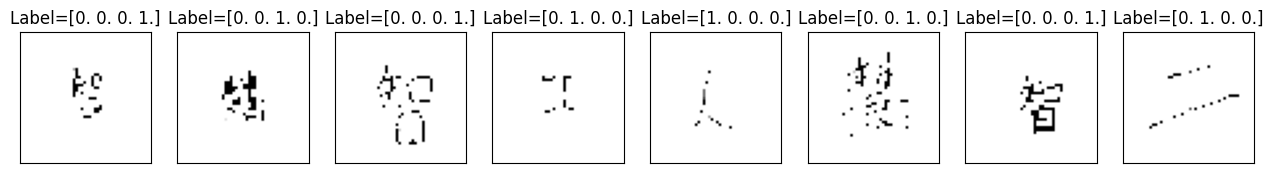

batch 6: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


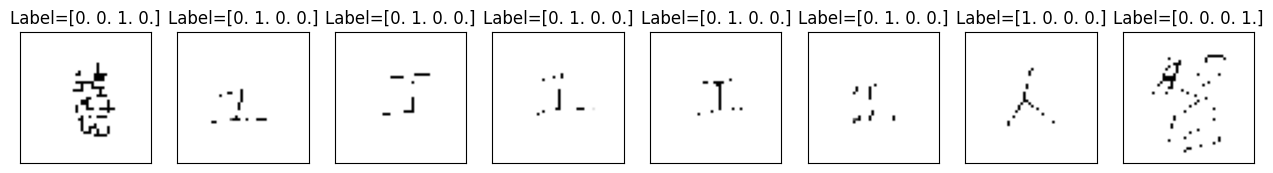

batch 7: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


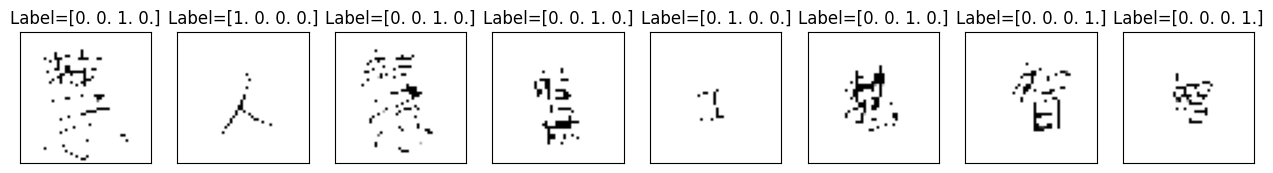

batch 8: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


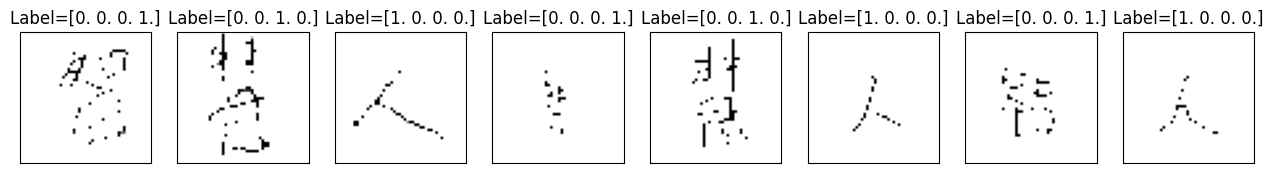

batch 9: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


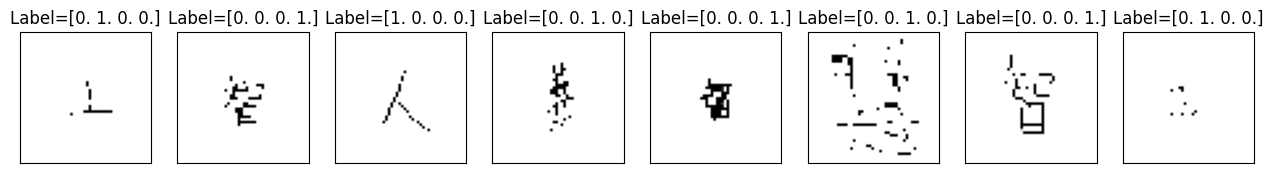

batch 10: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


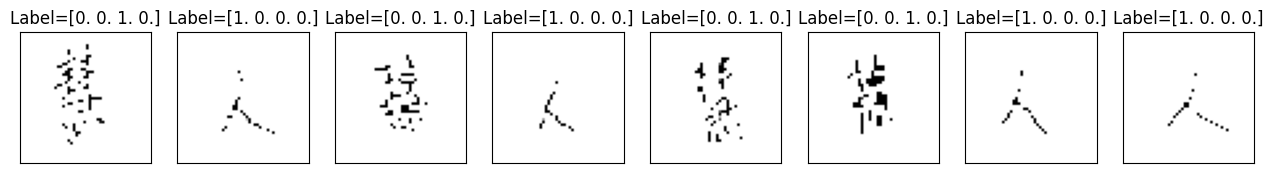

batch 11: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


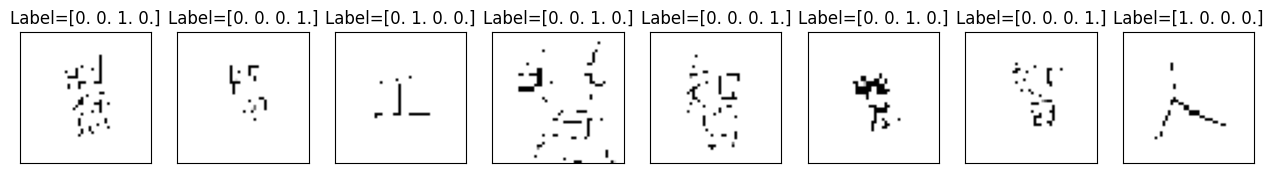

batch 12: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


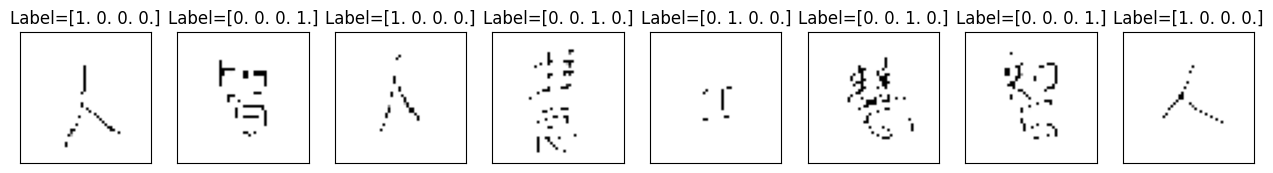

batch 13: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


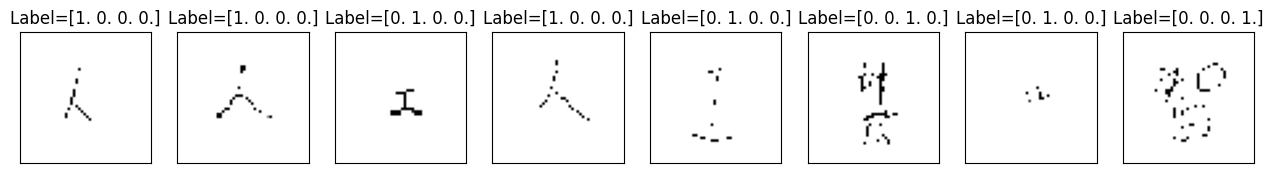

batch 14: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


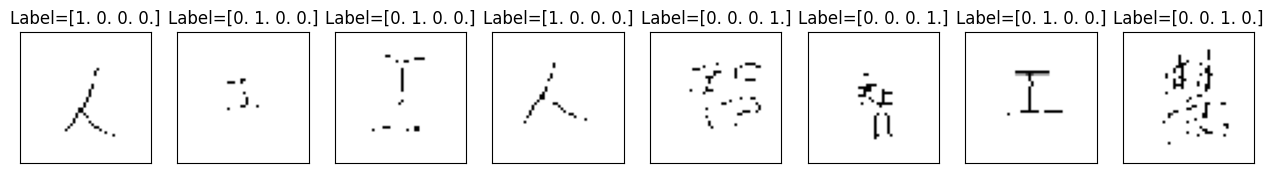

batch 15: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


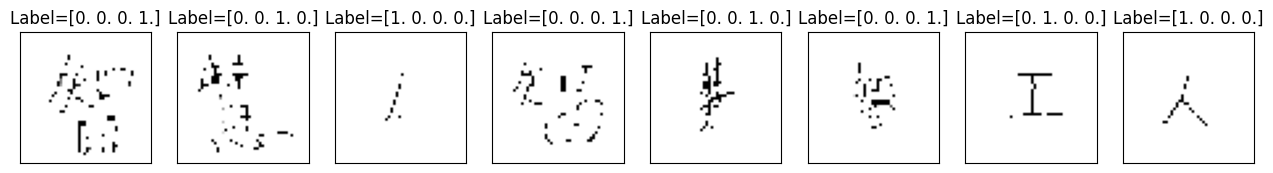

batch 16: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


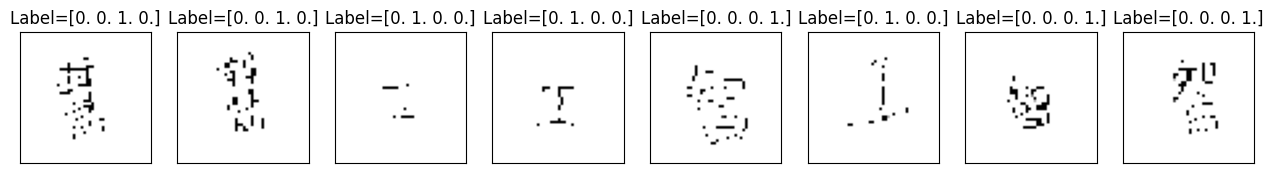

batch 17: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


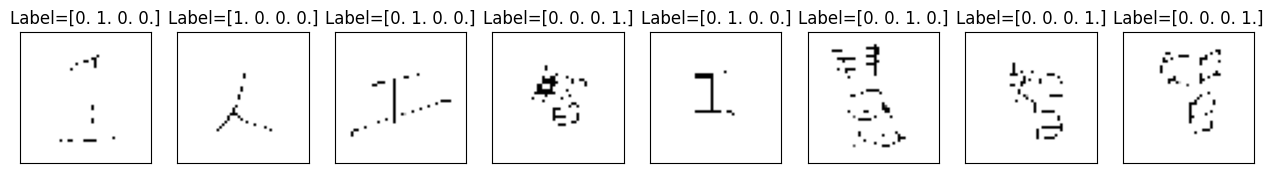

batch 18: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


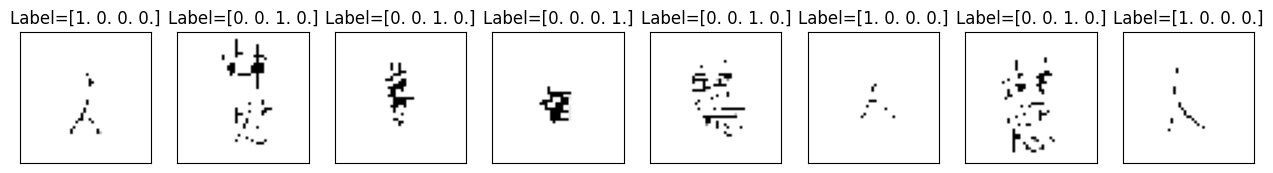

batch 19: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


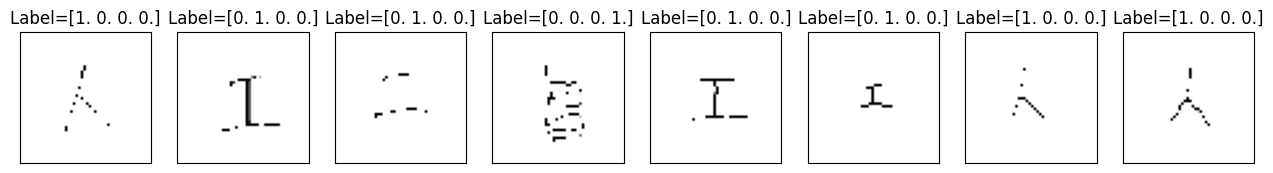

batch 20: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


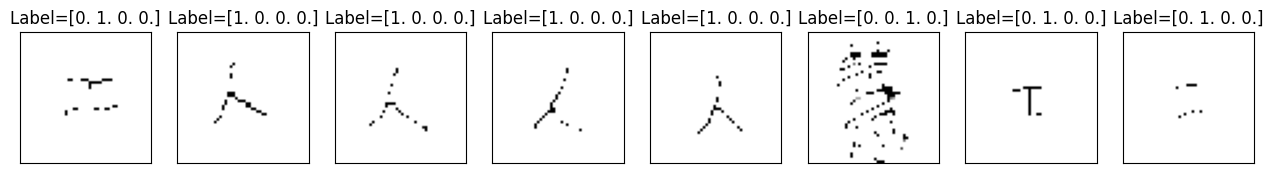

batch 21: 
 shape of images: (4, 50, 50, 3) 
 shape of labels: (4, 4)


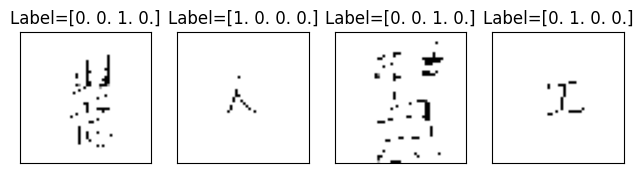

There are 21 batches.


In [26]:
def Plot_Genetor( imgs, labels=[], grid=(1,10), size=(20,2) ):
    n = len( imgs )
    plt.gcf().set_size_inches(size)
    for i in range(n):
        ax = plt.subplot( grid[0], grid[1], i+1 )
        ax.imshow( imgs[i] )
        if len(labels):
            ax.set_title( f'Label={labels[i]}' )
        ax.set_xticks([]); ax.set_yticks([])
    plt.show()

batch = 1
for data, label in Train_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Genetor( data, label )
    batch += 1
    if batch > len(Train_Generator):
        break

print( f'There are {len(Train_Generator)} batches.' )

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
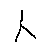

In [29]:
img = Loading_Image( img_list[1] )
img_array = np.array(img)
img_array